<a href="https://colab.research.google.com/github/data-science-projects-for-portfolio/Python-for-Data-Science-Education/blob/main/DataAnalys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Аналіз даних
Виконав: Стороженко Анатолій  
Студент 3-ого курсу, ПМ-351

In [1]:
import numpy as np
import pandas as pd

from scipy.stats import mode

import warnings
warnings.filterwarnings('ignore')

**Опис датасета**

Статистичні дані про ряд будинків в Каліфорнії, засновані на переписі 1990 року.

* **longitude** - долгота
* **latitude** - широта
* **housing_median_age** - середній вік будинку
* **total_rooms** - загальна кількість кімнат
* **total_bedrooms** - загальна кількість спалень
* **population** - кількість проживаючих
* **households** - домогосподарства
* **ocean_proximity** - близькість океану
* **median_income** - середній прибуток
* **median_house_value** - середня вартість будинку

## Початковий аналіз датасету

In [2]:
DATASET_PATH = '/content/drive/MyDrive/Data/housing.csv'
df = pd.read_csv(DATASET_PATH, sep=',')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,2
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,4


In [3]:
df.shape

(20640, 11)

In [4]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,id
count,20640.000000,20640.000000,19918.000000,20640.000000,20433.000000,20041.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.471242,35.036934,28.653630,2635.763081,537.870553,1425.418243,499.539680,3.870671,206855.816909,10319.500000
std,5.041408,94.903955,12.576796,2181.615252,421.385070,1135.185798,382.329753,1.899822,115395.615874,5958.399114
min,-124.350000,-13534.030000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,786.000000,280.000000,2.563400,119600.000000,5159.750000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1165.000000,409.000000,3.534800,179700.000000,10319.500000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1726.000000,605.000000,4.743250,264725.000000,15479.250000
max,122.030000,1327.130000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,20639.000000


In [5]:
df['total_bedrooms'].median()

435.0

In [6]:
df['total_bedrooms'].describe()

count    20433.000000
mean       537.870553
std        421.385070
min          1.000000
25%        296.000000
50%        435.000000
75%        647.000000
max       6445.000000
Name: total_bedrooms, dtype: float64

### Робота з пустими комірками

In [7]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age    722
total_rooms             0
total_bedrooms        207
population            599
households              0
median_income           0
median_house_value      0
ocean_proximity         0
id                      0
dtype: int64

**housing_median_age**

Створимо допоміжний ознаку і заповнимо її 0, якщо пропуску в housing_median_age немає і 1, коли пропуски є

In [8]:
df['housing_median_age_nan'] = 0
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id,housing_median_age_nan
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,2,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,20635,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,20636,0
20637,-121.22,39.43,17.0,2254.0,485.0,NaN,433.0,1.7000,92300.0,INLAND,20637,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,20638,0


In [9]:
df.loc[df['housing_median_age'].isna(), 'housing_median_age_nan']


25       0
117      0
138      0
170      0
299      0
        ..
20531    0
20536    0
20600    0
20601    0
20604    0
Name: housing_median_age_nan, Length: 722, dtype: int64

In [10]:
df.loc[df['housing_median_age'].isna(), 'housing_median_age_nan'] = 1

In [11]:
df[df['housing_median_age_nan'] == 1]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id,housing_median_age_nan
25,-122.28,37.85,NaN,535.0,123.0,317.0,119.0,2.4038,107500.0,NEAR BAY,25,1
117,-122.25,37.83,NaN,4190.0,1105.0,1786.0,1037.0,3.0897,234100.0,NEAR BAY,117,1
138,-122.20,37.82,NaN,1229.0,181.0,420.0,176.0,7.0175,366700.0,NEAR BAY,138,1
170,-122.25,37.79,NaN,629.0,188.0,742.0,196.0,2.6458,125000.0,NEAR BAY,170,1
299,-122.17,37.76,NaN,1764.0,397.0,987.0,354.0,2.4333,98200.0,NEAR BAY,299,1
...,...,...,...,...,...,...,...,...,...,...,...,...
20531,-121.81,38.58,NaN,1964.0,314.0,808.0,286.0,5.9629,286000.0,INLAND,20531,1
20536,-121.73,38.55,NaN,1717.0,393.0,1224.0,387.0,2.7917,130800.0,INLAND,20536,1
20600,-121.57,39.16,NaN,1632.0,367.0,769.0,330.0,3.1029,71700.0,INLAND,20600,1
20601,-121.57,39.13,NaN,442.0,103.0,413.0,88.0,1.5694,57900.0,INLAND,20601,1


In [12]:
df['housing_median_age_nan'].value_counts()

0    19918
1      722
Name: housing_median_age_nan, dtype: int64

In [13]:
median = df['housing_median_age'].median()
df['housing_median_age'].fillna(median).isna().sum()

0

In [14]:
df['housing_median_age'].isna().sum()

722

In [15]:
df['housing_median_age'] = df['housing_median_age'].fillna(median)
df['housing_median_age'].isna().sum()

0

**population**

In [16]:
median = df['population'].median()
df['population'].fillna(median, inplace=True)

In [17]:
df['population'].isna().sum()

0

**total_bedrooms**

In [18]:
median = df['total_bedrooms'].median()
df['total_bedrooms'].fillna(median, inplace=True)
df['total_bedrooms'].isna().sum()

0

Продовжуємо позбуватись пустих даних

In [19]:
medians = df[['housing_median_age', 'total_bedrooms', 'population']].median()
medians

housing_median_age      29.0
total_bedrooms         435.0
population            1165.0
dtype: float64

In [20]:
df[['housing_median_age', 'total_bedrooms', 'population']] = \
        df[['housing_median_age', 'total_bedrooms', 'population']].fillna(medians)

In [21]:
df.isna().sum()

longitude                 0
latitude                  0
housing_median_age        0
total_rooms               0
total_bedrooms            0
population                0
households                0
median_income             0
median_house_value        0
ocean_proximity           0
id                        0
housing_median_age_nan    0
dtype: int64

**ocean_proximity**

In [22]:
df['ocean_proximity_nan'] = 0
df.loc[df['ocean_proximity'] == '-', 'ocean_proximity_nan'] = 1

In [23]:
df[df['ocean_proximity_nan'] == 1].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id,housing_median_age_nan,ocean_proximity_nan
1153,-121.46,39.54,14.0,5549.0,1000.0,1822.0,919.0,2.9562,142300.0,-,1153,0,1
2435,-119.59,36.57,19.0,1733.0,303.0,911.0,281.0,3.5987,131700.0,-,2435,0,1
2636,-124.15,40.59,39.0,1186.0,238.0,539.0,212.0,2.0938,79600.0,-,2636,0,1
5980,-117.74,34.10,26.0,2723.0,604.0,1847.0,498.0,2.6779,136000.0,-,5980,0,1
6373,-118.02,34.15,44.0,2419.0,437.0,1045.0,432.0,3.8750,280800.0,-,6373,0,1


In [24]:
df.isna().sum()

longitude                 0
latitude                  0
housing_median_age        0
total_rooms               0
total_bedrooms            0
population                0
households                0
median_income             0
median_house_value        0
ocean_proximity           0
id                        0
housing_median_age_nan    0
ocean_proximity_nan       0
dtype: int64

In [25]:
df['ocean_proximity'].mode()

0    <1H OCEAN
dtype: object

In [26]:
df['ocean_proximity'].mode()[0]

'<1H OCEAN'

In [27]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9127
INLAND        6542
NEAR OCEAN    2655
NEAR BAY      2288
-               23
ISLAND           5
Name: ocean_proximity, dtype: int64

Замінимо значення "-" в ознаці ocean_proximity на найпопулярніше значення в ознаці, тобто на моду.

In [28]:
df.replace(
    {'ocean_proximity':
     {'-': df['ocean_proximity'].mode()[0]}
    },
    inplace=True)

df['ocean_proximity'].replace(
    {'-': df['ocean_proximity'].mode()[0]},
    inplace=True)

In [29]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9150
INLAND        6542
NEAR OCEAN    2655
NEAR BAY      2288
ISLAND           5
Name: ocean_proximity, dtype: int64

## Підготовка даних

### Обробка викидів
    
Ненормальних спостережень, які знаходяться далеко від інших спостережень.

In [30]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,id,housing_median_age_nan,ocean_proximity_nan
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.471242,35.036934,28.665746,2635.763081,536.838857,1417.860562,499.539680,3.870671,206855.816909,10319.500000,0.034981,0.001114
std,5.041408,94.903955,12.355019,2181.615252,419.391878,1119.445348,382.329753,1.899822,115395.615874,5958.399114,0.183735,0.033364
min,-124.350000,-13534.030000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000,0.000000,0.000000
25%,-121.800000,33.930000,19.000000,1447.750000,297.000000,797.000000,280.000000,2.563400,119600.000000,5159.750000,0.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1165.000000,409.000000,3.534800,179700.000000,10319.500000,0.000000,0.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1701.000000,605.000000,4.743250,264725.000000,15479.250000,0.000000,0.000000
max,122.030000,1327.130000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,20639.000000,1.000000,1.000000


_Шірота приймає значення від -90 ° до 90 °. 0 ° - широта екватора; -90 ° - широта Південного полюса; 90 ° - широта Північного полюса. Позитивні значення відповідають північній широті (точки на північ від екватора, скорочено пн.ш. або N); негативні - південній широті (точки на південь від екватора, скорочено пд.ш. або S).
Довгота відлічується від нульового меридіана (IERS Reference Meridian в системі WGS 84) і приймає значення від -180 ° до 180 °. Позитивні значення відповідають східній довготі (скорочено с.д. або E); негативні - західній довготі (скорочено з.д. або W) ._


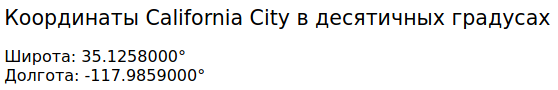

**longitude**

In [31]:
df[df['longitude'] >= 0]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id,housing_median_age_nan,ocean_proximity_nan
3479,118.51,34.29,29.0,1287.0,194.0,525.0,187.0,6.4171,319300.0,<1H OCEAN,3479,0,0
5904,118.43,34.29,39.0,1769.0,410.0,1499.0,390.0,3.1212,153500.0,<1H OCEAN,5904,0,0
8405,118.36,33.93,40.0,1625.0,500.0,2036.0,476.0,2.6298,156500.0,<1H OCEAN,8405,0,0
8636,118.41,33.88,43.0,2492.0,449.0,1033.0,437.0,7.9614,500001.0,<1H OCEAN,8636,0,0
13051,121.29,38.61,17.0,13553.0,2474.0,6544.0,2359.0,3.9727,132700.0,INLAND,13051,0,0
15263,117.27,33.02,21.0,2144.0,340.0,928.0,344.0,5.7980,286100.0,NEAR OCEAN,15263,0,0
17085,0.00,37.47,33.0,1266.0,415.0,1991.0,334.0,2.9200,202800.0,NEAR OCEAN,17085,0,0
17359,0.00,34.88,4.0,3680.0,559.0,1678.0,569.0,5.0639,201700.0,<1H OCEAN,17359,0,0
18551,122.03,36.96,28.0,1607.0,421.0,926.0,385.0,2.4250,216100.0,NEAR OCEAN,18551,0,0
19423,0.00,37.69,5.0,9601.0,1639.0,4449.0,1575.0,4.5332,195500.0,INLAND,19423,0,0


In [32]:
df['longitude_outlier'] = 0
df.loc[df['longitude'] >= 0, 'longitude_outlier'] = 1


In [33]:
df[df['longitude'] >= 0]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id,housing_median_age_nan,ocean_proximity_nan,longitude_outlier
3479,118.51,34.29,29.0,1287.0,194.0,525.0,187.0,6.4171,319300.0,<1H OCEAN,3479,0,0,1
5904,118.43,34.29,39.0,1769.0,410.0,1499.0,390.0,3.1212,153500.0,<1H OCEAN,5904,0,0,1
8405,118.36,33.93,40.0,1625.0,500.0,2036.0,476.0,2.6298,156500.0,<1H OCEAN,8405,0,0,1
8636,118.41,33.88,43.0,2492.0,449.0,1033.0,437.0,7.9614,500001.0,<1H OCEAN,8636,0,0,1
13051,121.29,38.61,17.0,13553.0,2474.0,6544.0,2359.0,3.9727,132700.0,INLAND,13051,0,0,1
15263,117.27,33.02,21.0,2144.0,340.0,928.0,344.0,5.7980,286100.0,NEAR OCEAN,15263,0,0,1
17085,0.00,37.47,33.0,1266.0,415.0,1991.0,334.0,2.9200,202800.0,NEAR OCEAN,17085,0,0,1
17359,0.00,34.88,4.0,3680.0,559.0,1678.0,569.0,5.0639,201700.0,<1H OCEAN,17359,0,0,1
18551,122.03,36.96,28.0,1607.0,421.0,926.0,385.0,2.4250,216100.0,NEAR OCEAN,18551,0,0,1
19423,0.00,37.69,5.0,9601.0,1639.0,4449.0,1575.0,4.5332,195500.0,INLAND,19423,0,0,1


In [34]:
df.loc[df['longitude'] > 0, 'longitude'] * -1

3479    -118.51
5904    -118.43
8405    -118.36
8636    -118.41
13051   -121.29
15263   -117.27
18551   -122.03
Name: longitude, dtype: float64

In [35]:
df.loc[df['longitude'] > 0, 'longitude'] = df.loc[df['longitude'] > 0, 'longitude'] * -1

In [36]:
df.loc[df['longitude'] == 0, 'longitude'] = df['longitude'].median()

In [37]:
df[df['longitude'] >= 0]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id,housing_median_age_nan,ocean_proximity_nan,longitude_outlier


**latitude**

In [38]:
df[(df['latitude'] <= 0) | (df['latitude'] > 50)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id,housing_median_age_nan,ocean_proximity_nan,longitude_outlier
8283,-118.13,-13534.03,45.0,1016.0,172.0,361.0,163.0,7.5000,434500.0,NEAR OCEAN,8283,0,0,0
12772,-121.42,1327.13,29.0,2217.0,536.0,1203.0,507.0,1.9412,73100.0,INLAND,12772,1,0,0


In [39]:
df['latitude_outlier'] = 0
df.loc[(df['latitude'] <= 0) | (df['latitude'] > 50), 'latitude_outlier'] = 1

In [40]:
df[(df['latitude'] <= 0) | (df['latitude'] > 50)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id,housing_median_age_nan,ocean_proximity_nan,longitude_outlier,latitude_outlier
8283,-118.13,-13534.03,45.0,1016.0,172.0,361.0,163.0,7.5000,434500.0,NEAR OCEAN,8283,0,0,0,1
12772,-121.42,1327.13,29.0,2217.0,536.0,1203.0,507.0,1.9412,73100.0,INLAND,12772,1,0,0,1


In [41]:
df.loc[(df['latitude'] <= 0) | (df['latitude'] > 50), 'latitude'] = df['latitude'].median()

In [42]:
df[(df['latitude'] <= 0) | (df['latitude'] > 50)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id,housing_median_age_nan,ocean_proximity_nan,longitude_outlier,latitude_outlier


**total_rooms**

Знайдемо викиди за допомогою квантилів. Спостереження, значення яких більше 97,5% квантиля і які менше 2,5% квантиля вважатимемо викидами і замінювати на медіану.

In [43]:
df['total_rooms'].describe()

count    20640.000000
mean      2635.763081
std       2181.615252
min          2.000000
25%       1447.750000
50%       2127.000000
75%       3148.000000
max      39320.000000
Name: total_rooms, dtype: float64

In [44]:
total_rooms_max_value = np.quantile(df['total_rooms'], q=0.975)
total_rooms_max_value

8069.074999999993

In [45]:
total_rooms_min_value = np.quantile(df['total_rooms'], q=0.025)
total_rooms_min_value

370.975

In [46]:
condition = (df['total_rooms'] > total_rooms_max_value) | (df['total_rooms'] < total_rooms_min_value)
df[condition]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id,housing_median_age_nan,ocean_proximity_nan,longitude_outlier,latitude_outlier
59,-122.29,37.82,2.0,158.0,43.0,94.0,57.0,2.5625,60000.0,NEAR BAY,59,0,0,0,0
61,-122.29,37.82,49.0,135.0,29.0,86.0,23.0,6.1183,75000.0,NEAR BAY,61,0,0,0,0
73,-122.29,37.81,46.0,12.0,4.0,18.0,7.0,0.4999,67500.0,NEAR BAY,73,0,0,0,0
81,-122.27,37.81,52.0,210.0,56.0,183.0,56.0,1.1667,112500.0,NEAR BAY,81,0,0,0,0
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0,NEAR BAY,82,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20578,-121.81,38.84,37.0,352.0,65.0,238.0,67.0,2.8542,275000.0,INLAND,20578,0,0,0,0
20620,-121.48,39.05,40.0,198.0,41.0,151.0,48.0,4.5625,100000.0,INLAND,20620,0,0,0,0
20625,-121.52,39.12,37.0,102.0,17.0,29.0,14.0,4.1250,72000.0,INLAND,20625,0,0,0,0
20627,-121.32,39.13,5.0,358.0,65.0,169.0,59.0,3.0000,162500.0,INLAND,20627,0,0,0,0


In [47]:
df.loc[condition, 'total_rooms'] = df['total_rooms'].median()
df['total_rooms'].describe()

count    20640.000000
mean      2435.698837
std       1358.232607
min        371.000000
25%       1511.000000
50%       2127.000000
75%       3006.000000
max       8069.000000
Name: total_rooms, dtype: float64

### Відбір і побудова нових ознак

In [48]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'id', 'housing_median_age_nan',
       'ocean_proximity_nan', 'longitude_outlier', 'latitude_outlier'],
      dtype='object')

In [49]:
df.drop(columns=['id'], inplace=True)

In [50]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'housing_median_age_nan',
       'ocean_proximity_nan', 'longitude_outlier', 'latitude_outlier'],
      dtype='object')

**Кількісні змінні**

In [51]:
# Частка спалень в загальній кількості кімнат
df['bedroom_share'] = df['total_bedrooms'] / df['total_rooms'] * 100

# Скільки людей в середньому живуть в одній кімнаті
df['population_per_room'] = df['population'] / df['total_rooms']

In [52]:
df[['bedroom_share', 'population_per_room']].head()

,bedroom_share,population_per_room
0,14.659091,0.365909
1,15.579659,0.338217
2,12.951602,0.338105
3,18.445840,0.437991
4,17.209588,0.347265


**Категоріальні змінні**  
Буде строкові ознаки переводити у числові

In [53]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9150
INLAND        6542
NEAR OCEAN    2655
NEAR BAY      2288
ISLAND           5
Name: ocean_proximity, dtype: int64

In [54]:
df = pd.concat([df, pd.get_dummies(df['ocean_proximity'])], axis=1)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,housing_median_age_nan,ocean_proximity_nan,longitude_outlier,latitude_outlier,bedroom_share,population_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,0,14.659091,0.365909,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,0,15.579659,0.338217,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,0,12.951602,0.338105,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,0,0,18.445840,0.437991,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,0,0,17.209588,0.347265,0,0,0,1,0


In [55]:
df_cat = df.groupby('ocean_proximity').mean()['total_rooms']
df_cat = pd.DataFrame(df_cat)

df_cat

,total_rooms
ocean_proximity,
<1H OCEAN,2433.195956
INLAND,2444.184500
ISLAND,1574.600000
NEAR BAY,2393.190559
NEAR OCEAN,2461.669680


In [56]:
df_cat = df.groupby('ocean_proximity', as_index=False).mean()[['ocean_proximity', 'total_rooms']]
df_cat = pd.DataFrame(df_cat)

df_cat

,ocean_proximity,total_rooms
0,<1H OCEAN,2433.195956
1,INLAND,2444.184500
2,ISLAND,1574.600000
3,NEAR BAY,2393.190559
4,NEAR OCEAN,2461.669680


In [57]:
df_cat.rename(columns={'total_rooms': 'median_rooms'}, inplace=True)

df_cat.sort_values(by='median_rooms')

,ocean_proximity,median_rooms
2,ISLAND,1574.600000
3,NEAR BAY,2393.190559
0,<1H OCEAN,2433.195956
1,INLAND,2444.184500
4,NEAR OCEAN,2461.669680


In [58]:
df = df.merge(df_cat, on=['ocean_proximity'])

df.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,housing_median_age_nan,ocean_proximity_nan,longitude_outlier,latitude_outlier,bedroom_share,population_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_rooms
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,0,14.659091,0.365909,0,0,0,1,0,2393.190559
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,0,15.579659,0.338217,0,0,0,1,0,2393.190559
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,0,12.951602,0.338105,0,0,0,1,0,2393.190559


**latitude, longitude**

Ідея трансформування координат взята мною з цього [сайту](https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-6-feature-engineering-and-feature-selection-8b94f870706a)

In [59]:
# pip install reverse_geocoder

In [60]:
import reverse_geocoder as revgc  

revgc.search((df.iloc[10].latitude, df.iloc[10].longitude))   

Loading formatted geocoded file...


[OrderedDict([('lat', '37.87159'),
              ('lon', '-122.27275'),
              ('name', 'Berkeley'),
              ('admin1', 'California'),
              ('admin2', 'Alameda County'),
              ('cc', 'US')])]

**Feature discretization** 

**Вік будівель (0-100)**

1 категорія - нові дома (до 5 років),<br>2 категорія - дома від 5 до 10<br>...


In [61]:
df['housing_median_age'].describe()

count    20640.000000
mean        28.665746
std         12.355019
min          1.000000
25%         19.000000
50%         29.000000
75%         37.000000
max         52.000000
Name: housing_median_age, dtype: float64

In [62]:
def age_to_cat(X):

    X['age_cat'] = 0

    X.loc[X['housing_median_age'] <= 5, 'age_cat'] = 1  
    X.loc[(X['housing_median_age'] > 5) & (X['housing_median_age'] <= 10), 'age_cat'] = 2
    X.loc[(X['housing_median_age'] > 10) & (X['housing_median_age'] <= 25), 'age_cat'] = 3
    X.loc[X['housing_median_age'] > 25, 'age_cat'] = 4

    return X

In [63]:
df = age_to_cat(df)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,housing_median_age_nan,ocean_proximity_nan,longitude_outlier,latitude_outlier,bedroom_share,population_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_rooms,age_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,0,14.659091,0.365909,0,0,0,1,0,2393.190559,4
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,0,15.579659,0.338217,0,0,0,1,0,2393.190559,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,0,12.951602,0.338105,0,0,0,1,0,2393.190559,4
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,0,0,18.445840,0.437991,0,0,0,1,0,2393.190559,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,0,0,17.209588,0.347265,0,0,0,1,0,2393.190559,4


Зробимо на всяк випадок ще одну ознаку.
Ознака буде бінарною:
1 - новий дім
0 - старий дім

In [64]:
def age_to_binary_cat(X):

    X['age_binary_cat'] = 0
    X.loc[X['housing_median_age'] <= 5, 'age_binary_cat'] = 1  

    return X

In [65]:
df = age_to_binary_cat(df)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,housing_median_age_nan,ocean_proximity_nan,longitude_outlier,latitude_outlier,bedroom_share,population_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_rooms,age_cat,age_binary_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,0,14.659091,0.365909,0,0,0,1,0,2393.190559,4,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,0,15.579659,0.338217,0,0,0,1,0,2393.190559,3,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,0,12.951602,0.338105,0,0,0,1,0,2393.190559,4,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,0,0,18.445840,0.437991,0,0,0,1,0,2393.190559,4,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,0,0,17.209588,0.347265,0,0,0,1,0,2393.190559,4,0


## Первинний статистичний аналіз або EDA - Exploratory Data Analysis
## Візуалізація багатовимірних даних

In [66]:
import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
matplotlib.rcParams.update({'font.size': 14})
# DATASET_PATH = '/content/drive/MyDrive/Data/housing.csv'
# df = pd.read_csv(DATASET_PATH, sep=',')
# df.head()

### Зменшення обєму пам'яті, котра займає датасет

https://www.kaggle.com/gemartin/load-data-reduce-memory-usage

In [67]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [68]:
df = reduce_mem_usage(df)

Memory usage of dataframe is 3.25 MB
Memory usage after optimization is: 1.63 MB
Decreased by 49.7%


In [69]:
df.dtypes

longitude                  float32
latitude                   float32
housing_median_age         float32
total_rooms                float32
total_bedrooms             float32
population                 float32
households                 float32
median_income              float32
median_house_value         float32
ocean_proximity           category
housing_median_age_nan        int8
ocean_proximity_nan           int8
longitude_outlier             int8
latitude_outlier              int8
bedroom_share              float32
population_per_room        float32
<1H OCEAN                  float32
INLAND                     float32
ISLAND                     float32
NEAR BAY                   float32
NEAR OCEAN                 float32
median_rooms               float32
age_cat                       int8
age_binary_cat                int8
dtype: object

### Розподіл

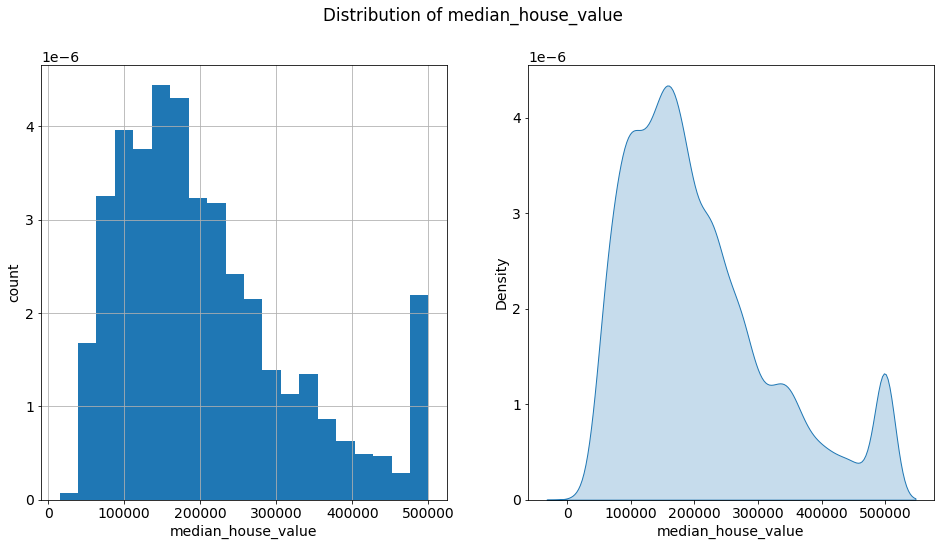

In [70]:
plt.figure(figsize = (16, 8))

plt.subplot(121)
df['median_house_value'].hist(density=True, bins=20)
plt.ylabel('count')
plt.xlabel('median_house_value')

plt.subplot(122)
sns.kdeplot(df['median_house_value'], shade=True, legend=False)
plt.xlabel('median_house_value')

plt.suptitle('Distribution of median_house_value')
plt.show()

In [71]:
df['median_house_value'].value_counts()

500001.0    965
137500.0    122
162500.0    117
112500.0    103
187500.0     93
           ... 
465700.0      1
386500.0      1
383200.0      1
373500.0      1
319600.0      1
Name: median_house_value, Length: 3842, dtype: int64

In [72]:
target_bins = df['median_house_value'] // 10000 * 10000
target_bins

0        450000.0
1        350000.0
2        350000.0
3        340000.0
4        340000.0
           ...   
20635    450000.0
20636    410000.0
20637    300000.0
20638    450000.0
20639    280000.0
Name: median_house_value, Length: 20640, dtype: float32

In [73]:
target_bins.value_counts().iloc[:10]

160000.0    1005
500000.0     992
150000.0     970
90000.0      920
180000.0     853
130000.0     850
110000.0     847
170000.0     807
140000.0     802
80000.0      768
Name: median_house_value, dtype: int64

In [74]:
len(np.unique(target_bins))

50

No handles with labels found to put in legend.


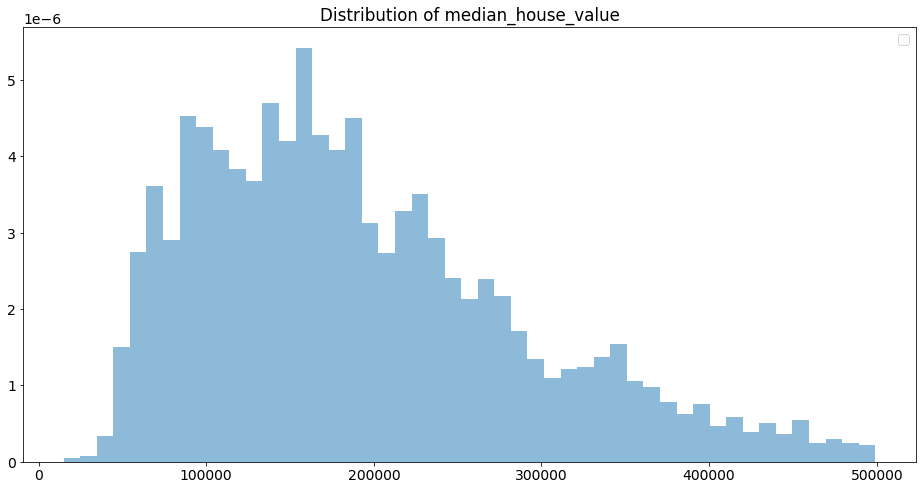

In [75]:
df = df[df['median_house_value'] < 500000]

target_mean = round(df['median_house_value'].mean(), 2)
target_median = df['median_house_value'].median()
target_mode = df['median_house_value'].mode()[0]

plt.figure(figsize = (16, 8))
plt.hist(df['median_house_value'], density=True,  bins=49, alpha=0.5)
# sns.displot(df['median_house_value'], bins=50)

y = np.linspace(0, 0.000005, 10)
# plt.plot([target_mean] * 10, y, label='mean',  linewidth=4)
# plt.plot([target_median] * 10, y, label='median', linewidth=4)
# plt.plot([target_mode] * 10, y, label='mode', linewidth=4)

plt.title('Distribution of median_house_value')
plt.legend()
plt.show()

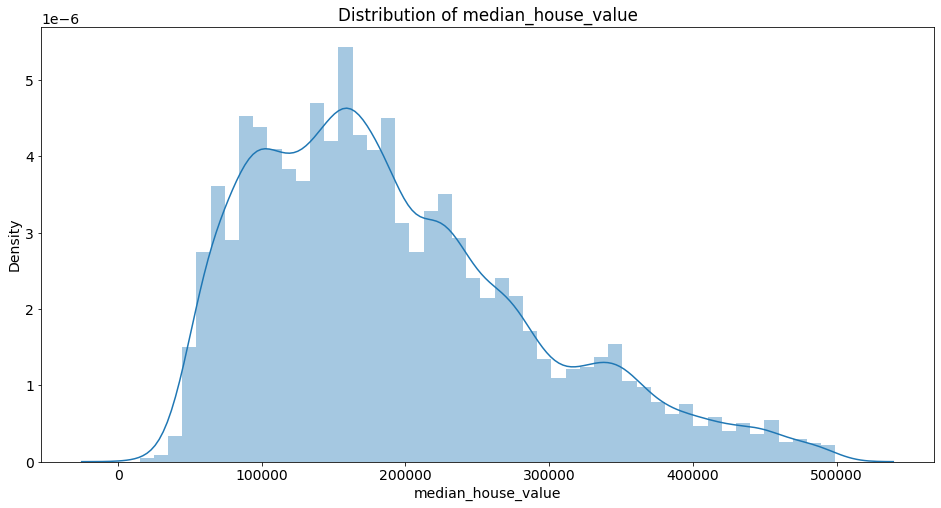

In [76]:
plt.figure(figsize = (16, 8))

sns.distplot(df['median_house_value'], bins=49) 

y = np.linspace(0, 0.000005, 10)

plt.title('Distribution of median_house_value')

plt.show()

### Аналіз ознак

#### Кількісні ознаки

In [77]:
df_num_features = df.select_dtypes(include=['float64', 'float32', 'float16'])
df_num_features.drop('median_house_value', axis=1, inplace=True)

In [78]:
df_num_features.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,bedroom_share,population_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_rooms
0,-122.230003,37.880001,41.0,880.0,129.0,322.0,126.0,8.3252,14.659091,0.365909,0.0,0.0,0.0,1.0,0.0,2393.190674
1,-122.220001,37.860001,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,15.579659,0.338217,0.0,0.0,0.0,1.0,0.0,2393.190674
2,-122.239998,37.849998,52.0,1467.0,190.0,496.0,177.0,7.2574,12.951602,0.338105,0.0,0.0,0.0,1.0,0.0,2393.190674
3,-122.250000,37.849998,52.0,1274.0,235.0,558.0,219.0,5.6431,18.445839,0.437991,0.0,0.0,0.0,1.0,0.0,2393.190674
4,-122.250000,37.849998,52.0,1627.0,280.0,565.0,259.0,3.8462,17.209589,0.347265,0.0,0.0,0.0,1.0,0.0,2393.190674


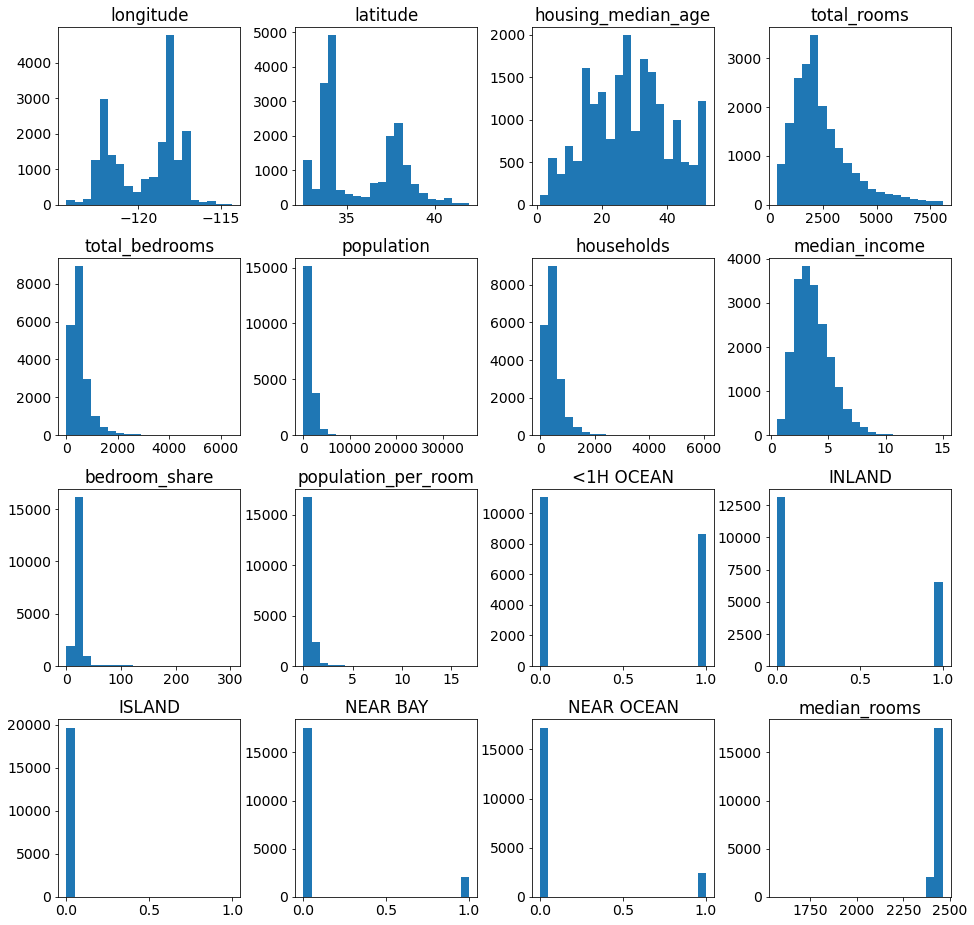

In [79]:
df_num_features.hist(figsize=(16, 16), bins=20, grid=False);

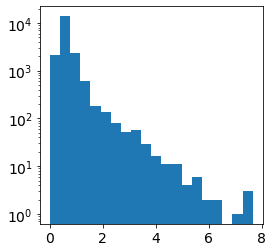

In [80]:
df[df['population_per_room'] < 10]['population_per_room'].hist(figsize=(4, 4), bins=20, grid=False);
plt.yscale('log')

In [81]:
df.loc[df['population_per_room'] > 2.5, 'population_per_room'] = df['population_per_room'].median()

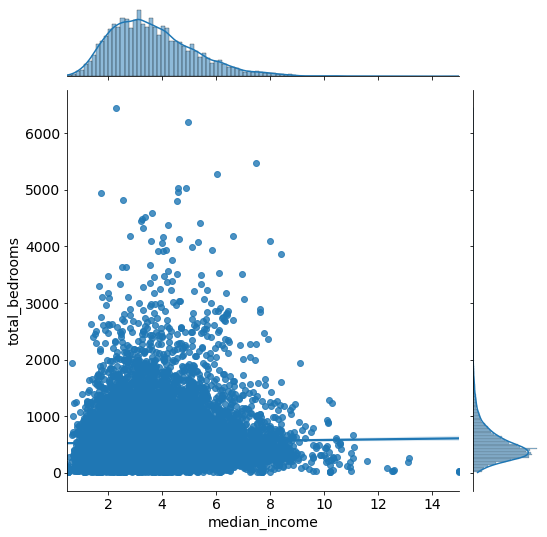

In [82]:
grid = sns.jointplot(df['median_income'], df['total_bedrooms'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

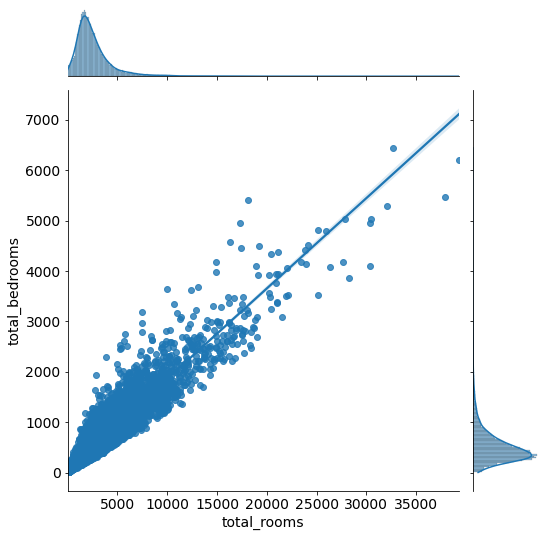

In [89]:
df1 = pd.read_csv(DATASET_PATH, sep=',')

grid = sns.jointplot(df1['total_rooms'], df1['total_bedrooms'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

In [84]:
df['total_bedrooms'].median()

435.0

In [85]:
df[df['total_bedrooms'] == 435].shape[0] * 100 / df.shape[0]

1.2011400651465798

In [86]:
df[df['total_bedrooms'] == df['total_bedrooms'].median()].shape[0]

236

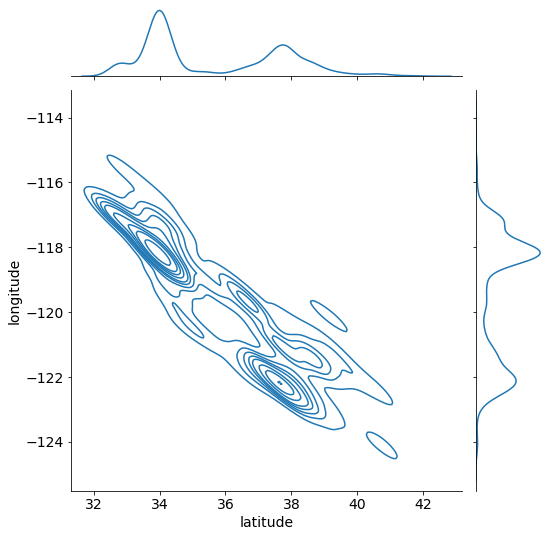

In [87]:
grid = sns.jointplot(df['latitude'], df['longitude'], kind='kde')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

In [90]:
df['city'] = (df['longitude'] > -120) * 1

In [91]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,housing_median_age_nan,ocean_proximity_nan,longitude_outlier,latitude_outlier,bedroom_share,population_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_rooms,age_cat,age_binary_cat,city
0,-122.230003,37.880001,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,0,14.659091,0.365909,0.0,0.0,0.0,1.0,0.0,2393.190674,4,0,0
1,-122.220001,37.860001,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,0,15.579659,0.338217,0.0,0.0,0.0,1.0,0.0,2393.190674,3,0,0
2,-122.239998,37.849998,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,0,12.951602,0.338105,0.0,0.0,0.0,1.0,0.0,2393.190674,4,0,0
3,-122.250000,37.849998,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,0,0,18.445839,0.437991,0.0,0.0,0.0,1.0,0.0,2393.190674,4,0,0
4,-122.250000,37.849998,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,0,0,17.209589,0.347265,0.0,0.0,0.0,1.0,0.0,2393.190674,4,0,0


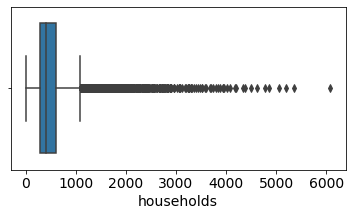

In [92]:
plt.figure(figsize=(6, 3))

sns.boxplot(df['households'], whis=1.5)

plt.xlabel('households')
plt.show()

In [94]:
df.loc[df['households'] > 1000, 'households'] = df['households'].median()

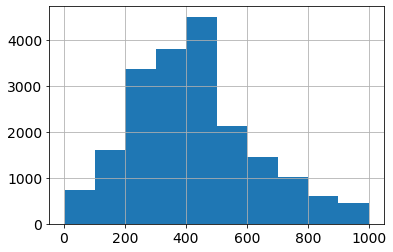

In [95]:
df['households'].hist();

### Категоріальні ознаки

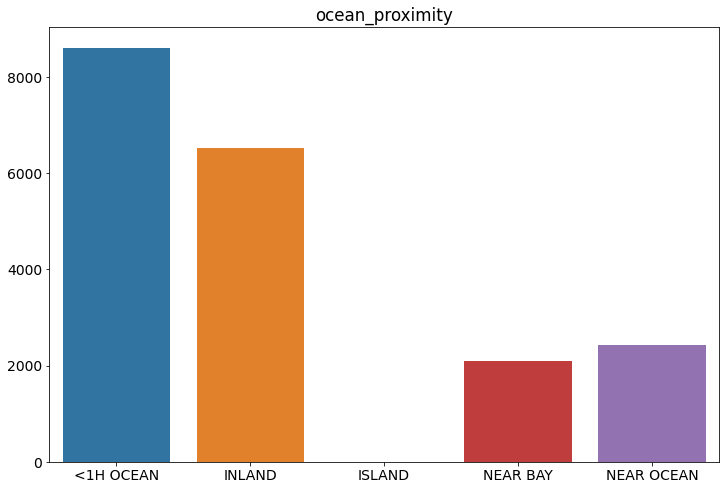

In [93]:
counts = df['ocean_proximity'].value_counts()
    
plt.figure(figsize=(12, 8))    
plt.title('ocean_proximity')
sns.barplot(counts.index, counts.values)
    
plt.show()

### Бінарні ознаки

In [96]:
df_bin_features = df.select_dtypes(include='int64')

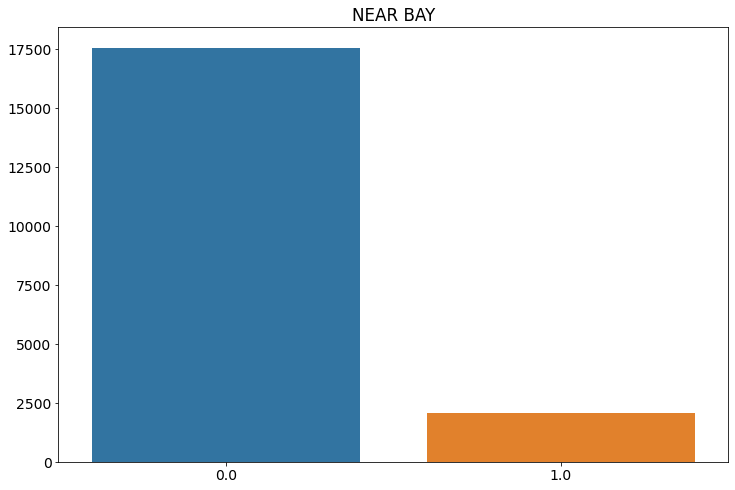

In [97]:
counts = df['NEAR BAY'].value_counts()
    
plt.figure(figsize=(12, 8))    
plt.title('NEAR BAY')
sns.barplot(counts.index, counts.values)
    
plt.show()

### Корреляційна матриця

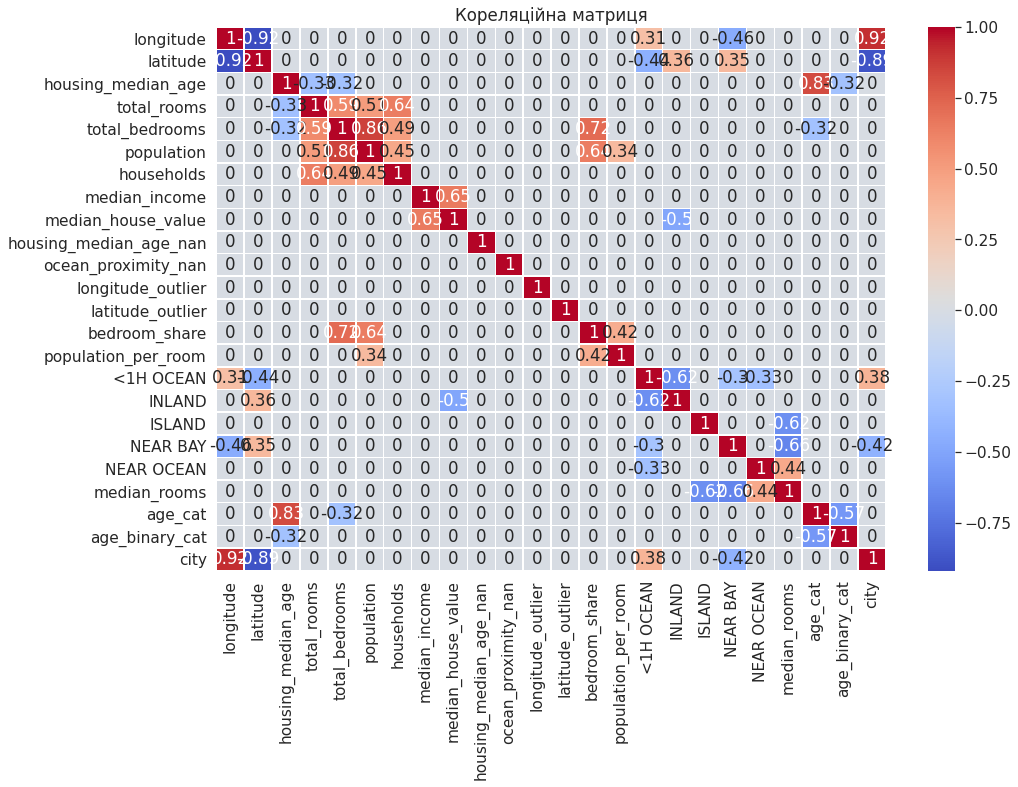

In [99]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.4)

corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Кореляційна матриця')
plt.show()

### Матриця діаграм розкиду

(23, 23)

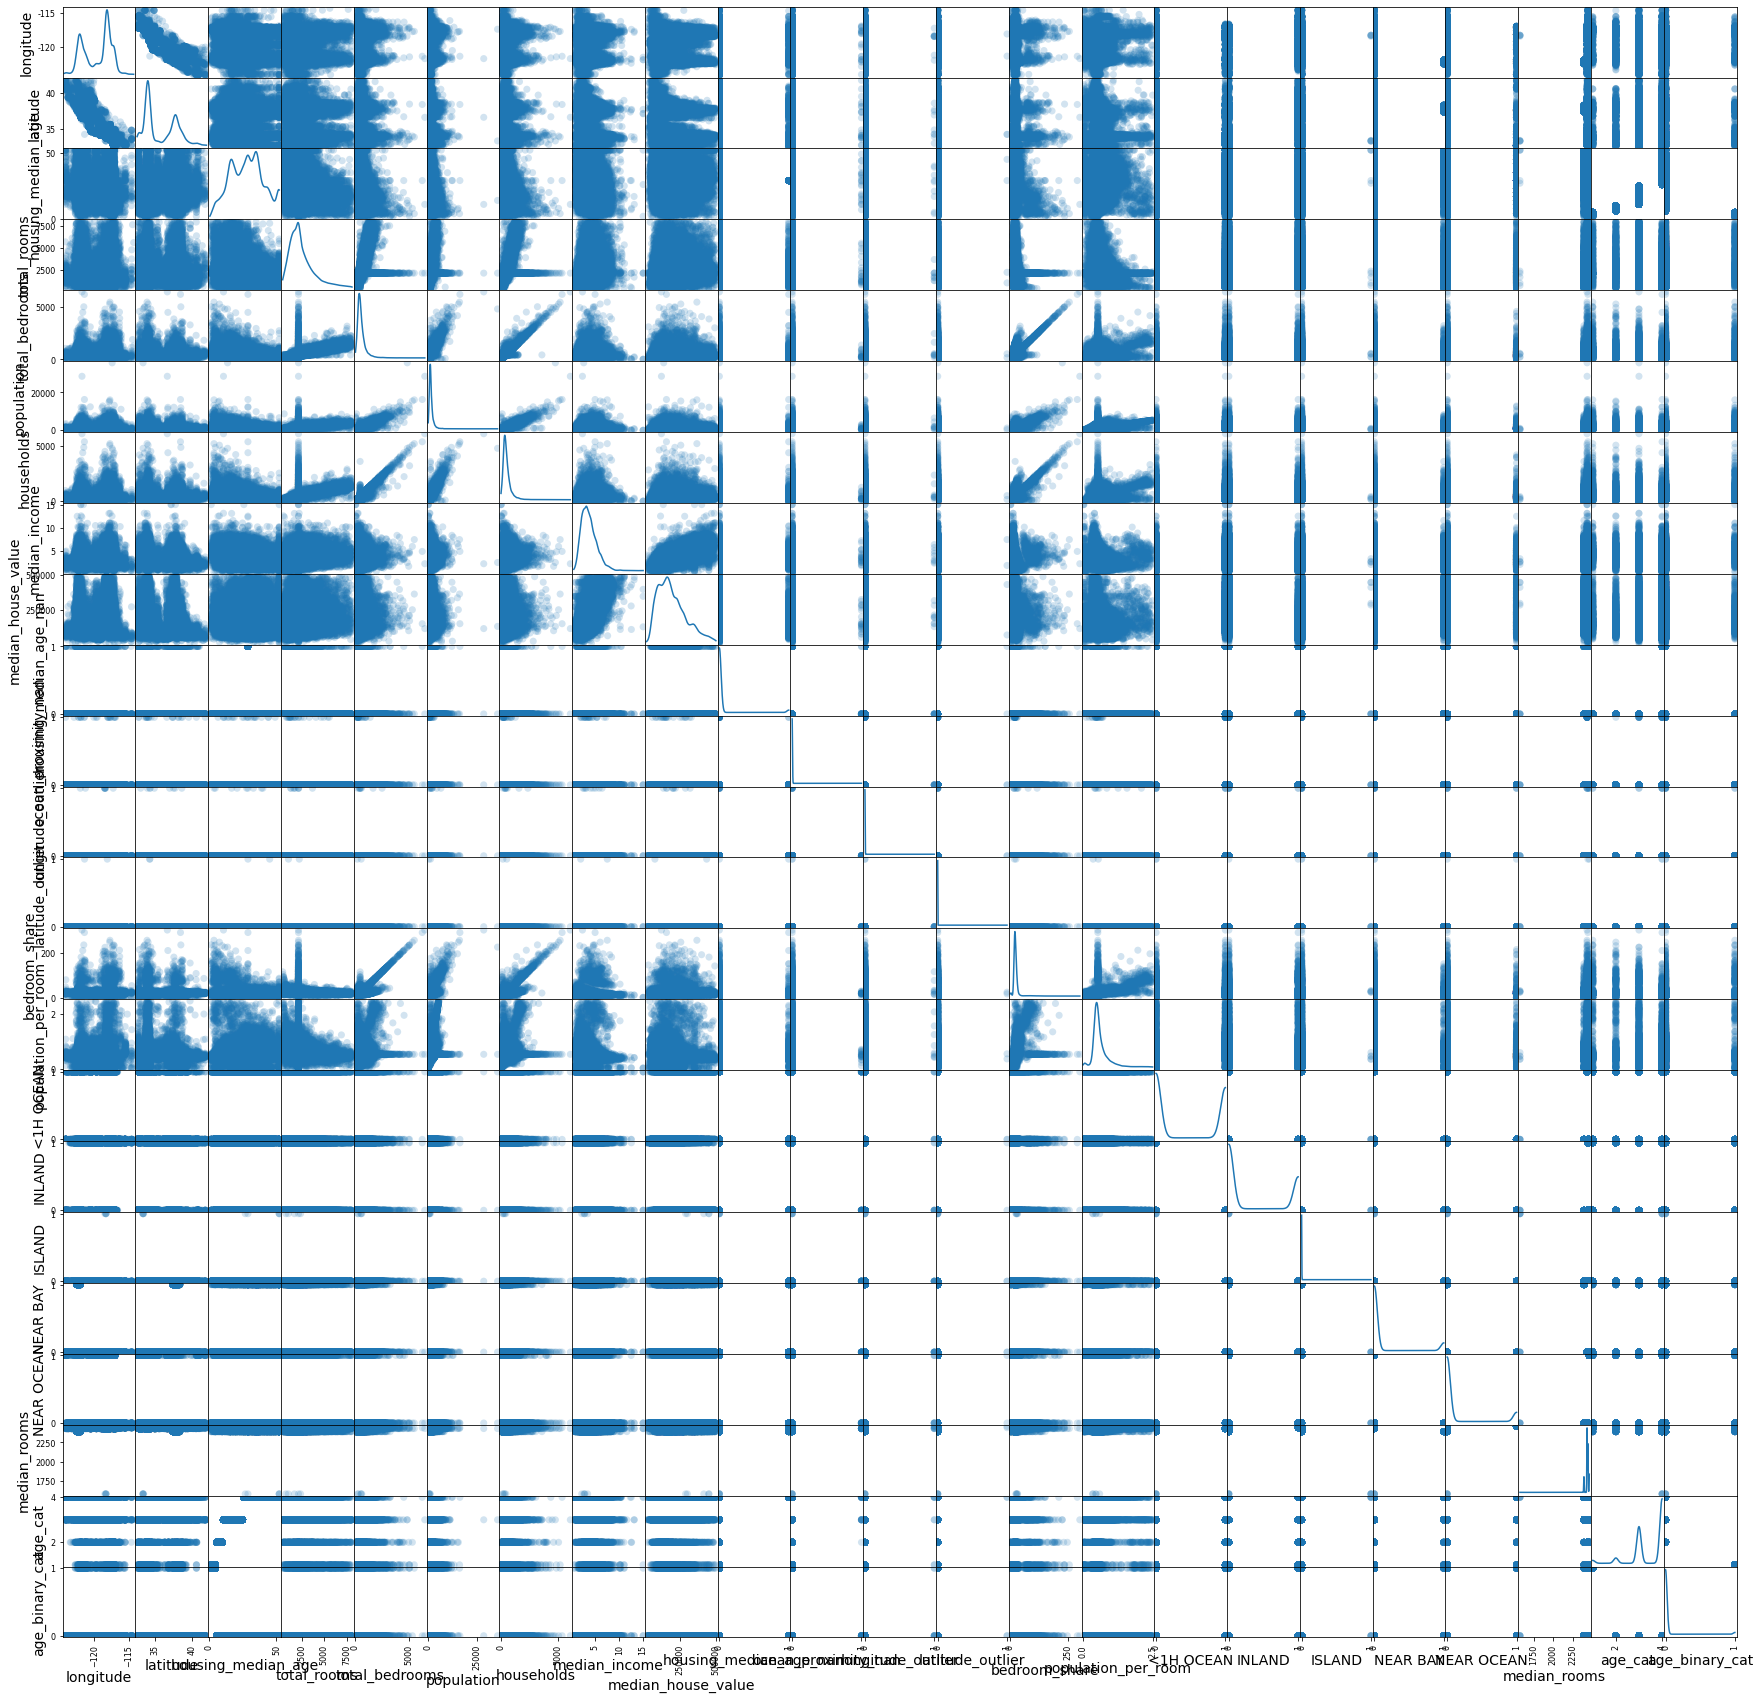

In [88]:
pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(30, 30), diagonal='kde', s=200).shape

### Аналіз залежностей( регрессії)

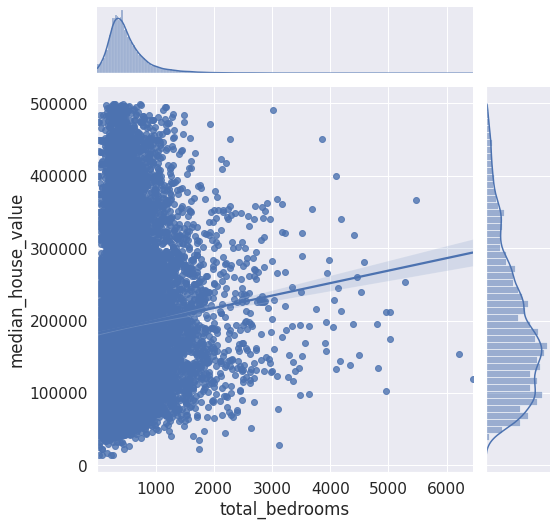

In [100]:
grid = sns.jointplot(df['total_bedrooms'], df['median_house_value'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

In [101]:
df['many_bedrooms'] = (df['total_bedrooms'] > 3000) * 1

**latitude**

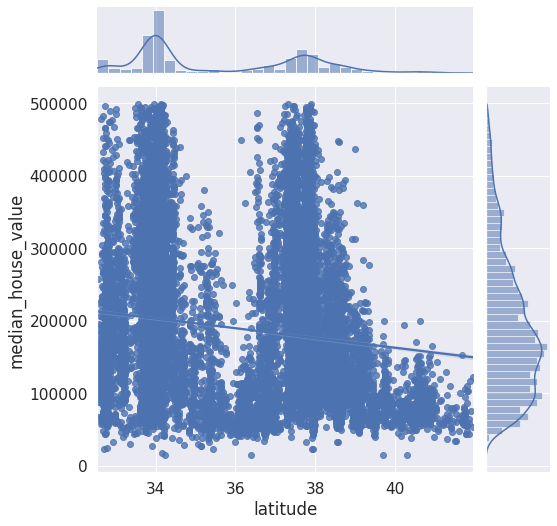

In [102]:
grid = sns.jointplot(df['latitude'], df['median_house_value'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

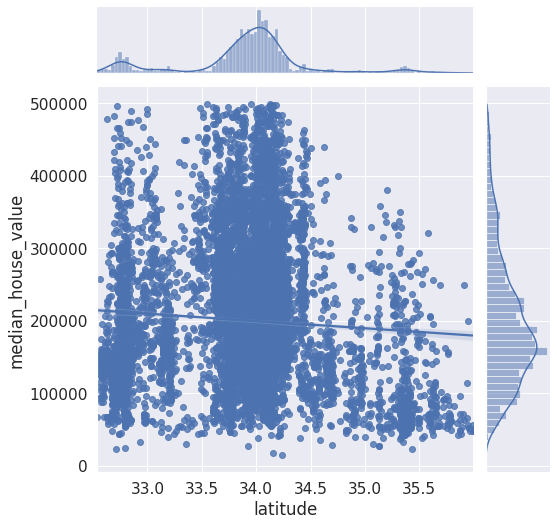

In [103]:
df_cut = df[df['latitude'] < 36]
grid = sns.jointplot(df_cut['latitude'], df_cut['median_house_value'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

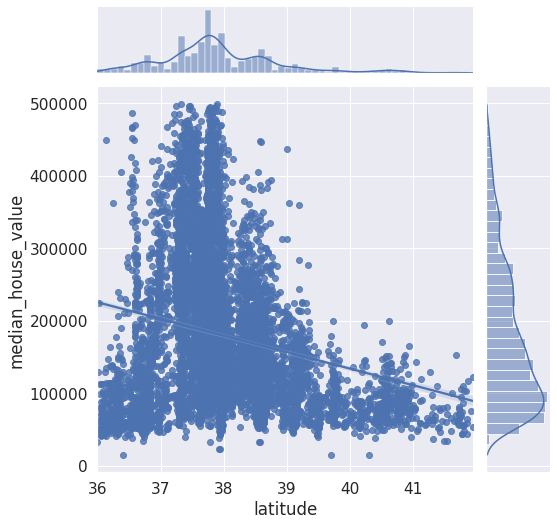

In [104]:
df_cut = df[df['latitude'] >= 36]
grid = sns.jointplot(df_cut['latitude'], df_cut['median_house_value'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

**longitude**

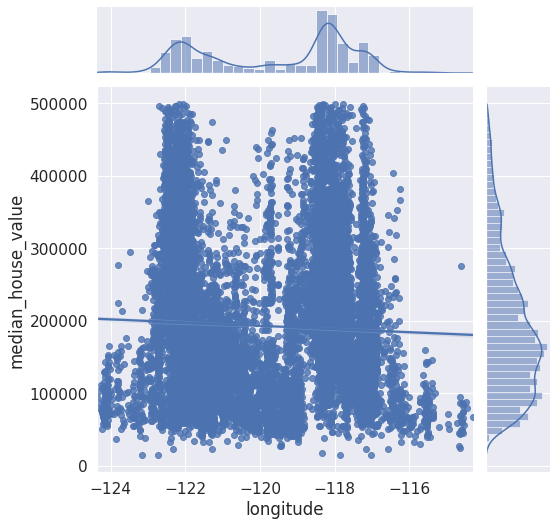

In [105]:
grid = sns.jointplot(df['longitude'], df['median_house_value'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

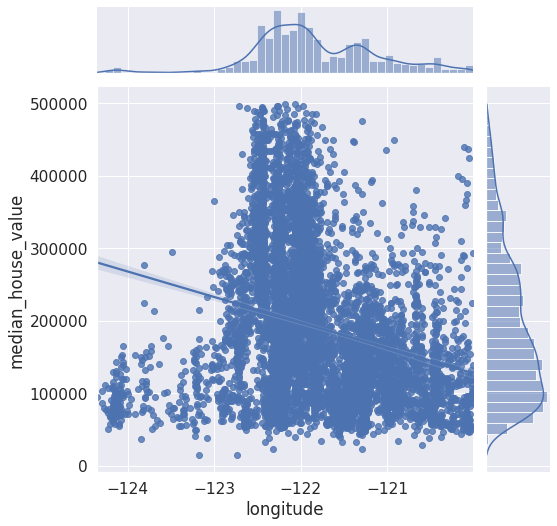

In [106]:
df_cut = df[df['longitude'] < -120]
grid = sns.jointplot(df_cut['longitude'], df_cut['median_house_value'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

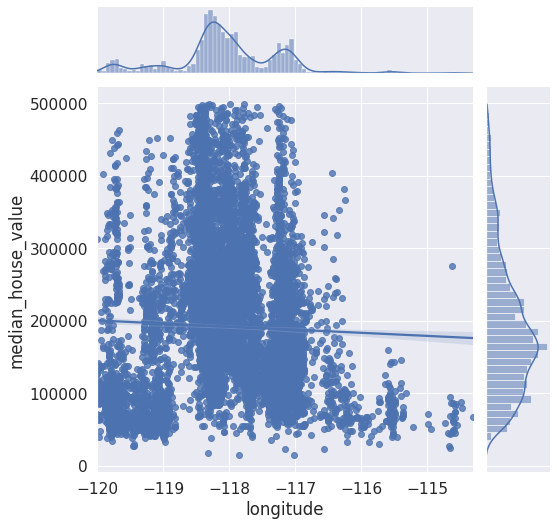

In [107]:
df_cut = df[df['longitude'] >= -120]
grid = sns.jointplot(df_cut['longitude'], df_cut['median_house_value'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

**Давайте подивимось на наші категоріальні/бінарні ознаки**  
**Через розподіл середнюї вартісті будинку по близкості до океану**

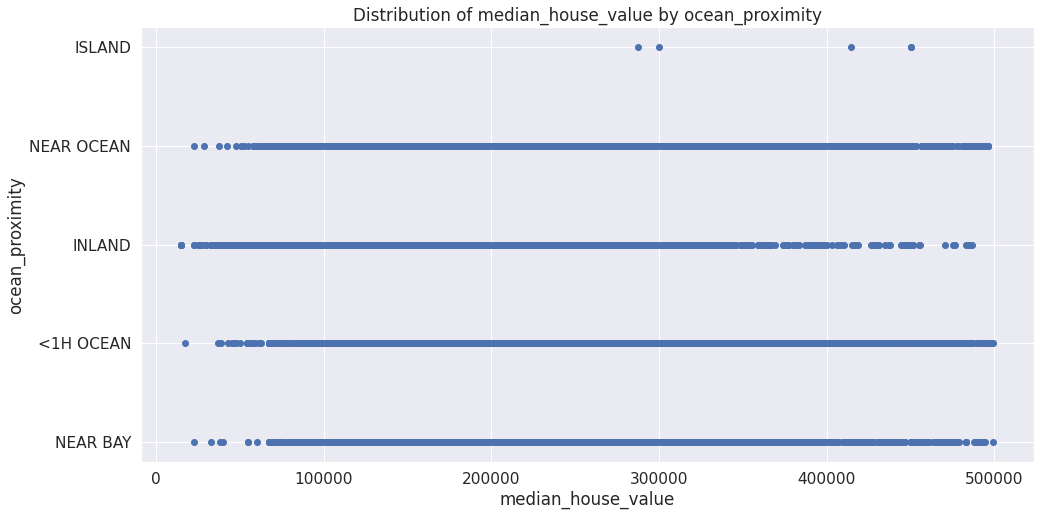

In [108]:
plt.figure(figsize=(16, 8))

plt.scatter(df['median_house_value'], df['ocean_proximity'])

plt.xlabel('median_house_value')
plt.ylabel('ocean_proximity')
plt.title('Distribution of median_house_value by ocean_proximity')
plt.show()

### Знову повертаємось до гео даних та будуємо карту

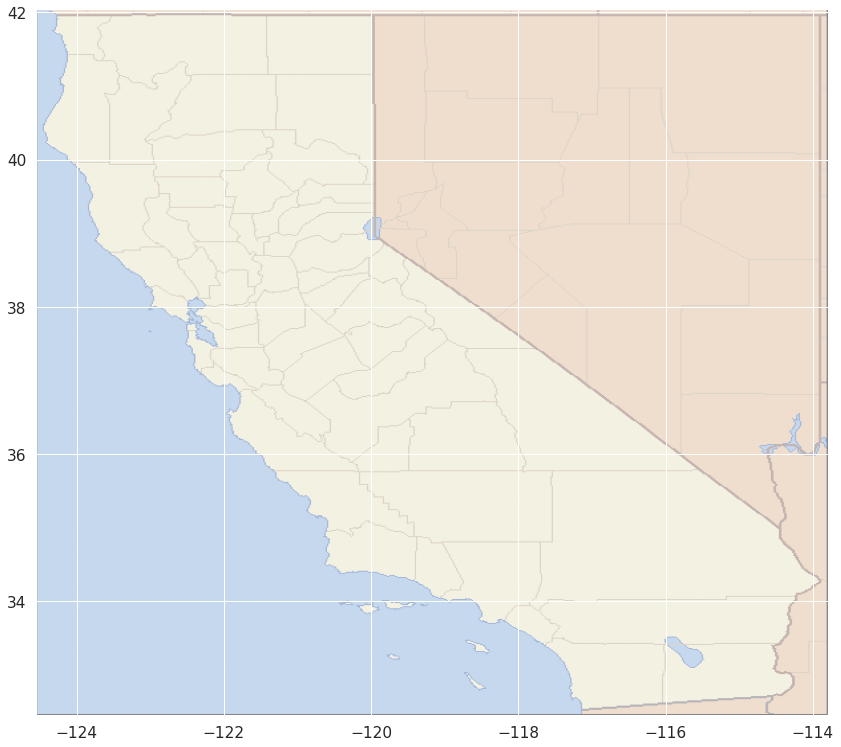

In [111]:
CALIFORNIA_MAP_PATH = '/content/drive/MyDrive/Data/California_Map.png'
california_map = img.imread(CALIFORNIA_MAP_PATH)

plt.figure(figsize=(20, 13))
plt.imshow(california_map, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)
plt.show()

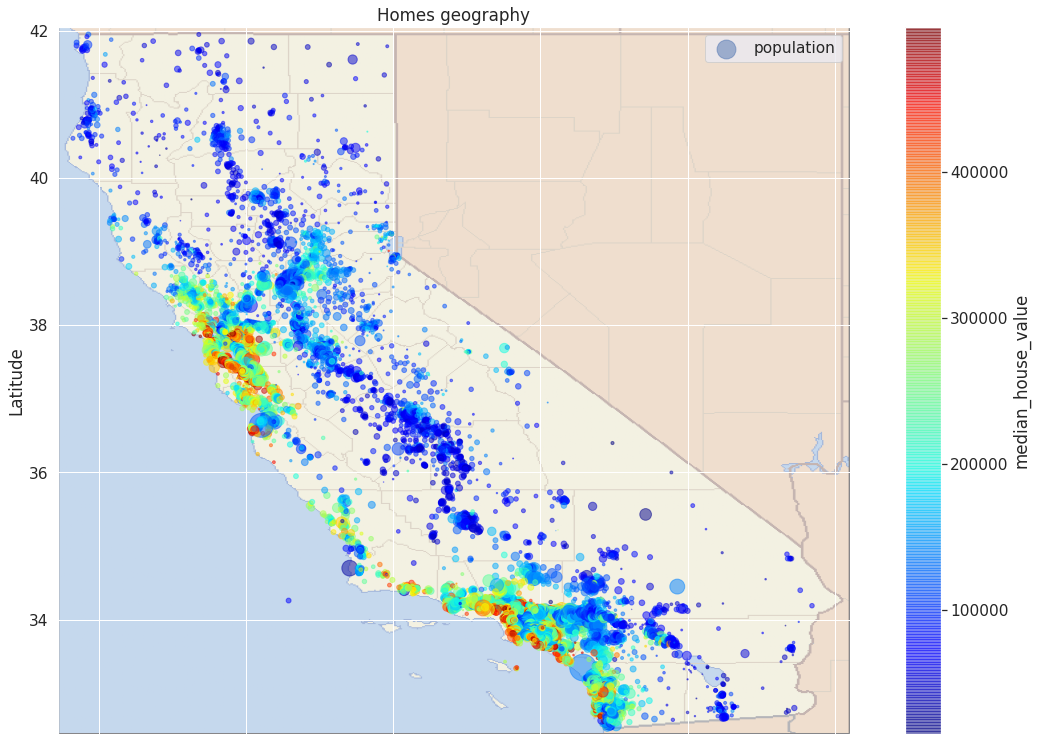

In [112]:
df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.5, 
        s=df['population'] / 50, label='population', c='median_house_value', 
        cmap=plt.get_cmap('jet'), figsize=(20,13))

plt.imshow(california_map, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Homes geography")
plt.legend() 
plt.show()

In [113]:
# !pip install keplergl==0.1.1

     |████████████████████████████████| 5.4MB 4.1MB/s 
     |████████████████████████████████| 1.0MB 42.2MB/s 
     |████████████████████████████████| 6.5MB 38.0MB/s 
     |████████████████████████████████| 15.3MB 224kB/s 
  Created wheel for keplergl: filename=keplergl-0.1.1-py2.py3-none-any.whl size=10798702 sha256=a8aeefff874798b99d881478a3fd60f674da61f67c7ac8e7cd238d6d359c2154
  Stored in directory: /root/.cache/pip/wheels/88/62/0e/6a65ae0dd019abe7511ee6e99e490def4345e9beb05b45b64d
Successfully built keplergl


In [114]:
from keplergl import KeplerGl 

map_ = KeplerGl(height=700)
map_.add_data(df, 'Data')
map_.save_to_html(file_name='/content/drive/MyDrive/Data/california.html')

User Guide: https://github.com/keplergl/kepler.gl/blob/master/docs/keplergl-jupyter/user-guide.md
Map saved to /content/drive/MyDrive/Data/california.html!
